In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook we demonstrate principal components analysis (PCA) on some fake data.

-JM Murray, https://murraylab.uoregon.edu

(-4.0, 4.0)

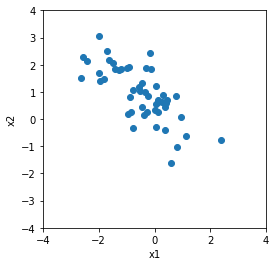

In [47]:
# Make up some two-dimensional data
n = 50
mu = np.array([-0.5, 1.])
sig = np.array([[1, -0.6], [-0.6, 0.8]])
x = np.random.multivariate_normal(mu, sig, n)

# Plot the data
plt.figure(figsize=(4,4))
plt.plot(x[:,0], x[:,1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-4,4)
plt.ylim(-4,4)

In [53]:
from sklearn.decomposition import PCA

# Subtract the mean from the data before performing PCA:
x_mean = np.mean(x, axis=0)
x_meansub = x - x_mean

# Perform PCA on the data:
pca = PCA()
pca.fit(x)
PCs = pca.components_  # each row is one of the PC vectors

print(PCs)

[[ 0.72799882 -0.68557838]
 [ 0.68557838  0.72799882]]


In [40]:
# Give names to the two PC vectors:
pc1 = PCs[0,:]
pc2 = PCs[1,:]

print('PC vectors have length=1: ', np.sqrt(pc1[0]**2 + pc1[1]**2), np.sqrt(pc2[0]**2 + pc2[1]**2))
print('PC vectors are orthogonal to one another: ', np.dot(pc1, pc2))

PC vectors have length=1:  0.9999999999999999 0.9999999999999999
PC vectors are orthogonal to one another:  0.0


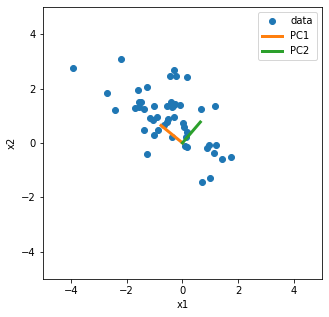

In [43]:
# Plot the PC vectors together with the data.

plt.figure(figsize=(5,5))
plt.plot(x[:,0], x[:,1], 'o')
plt.plot([0, pc1[0]], [0, pc1[1]], lw=3)
plt.plot([0, pc2[0]], [0, pc2[1]], lw=3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend(['data','PC1','PC2'])

In [44]:
# How much variance is explained by each PC?

print('Variance explained by (PC1, PC2): ', pca.explained_variance_)
print('Fraction of variance explained by (PC1, PC2): ', pca.explained_variance_ratio_)

Variance explained by (PC1, PC2):  [1.84473445 0.46204416]
Fraction of variance explained by (PC1, PC2):  [0.79970156 0.20029844]


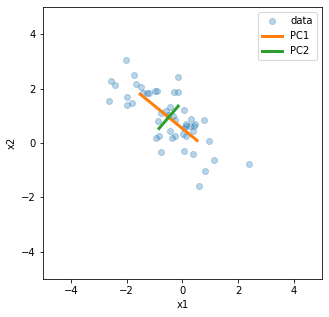

In [55]:
# Redo the above plot, but with the PCs scaled by the sqrt(variance) and centered with the data.

std1 = pca.explained_variance_[0]**0.5
std2 = pca.explained_variance_[1]**0.5
pc1_rescaled = std1*pc1
pc2_rescaled = std2*pc2

plt.figure(figsize=(5,5))
plt.plot(x[:,0], x[:,1], 'o', alpha=0.3)
plt.plot([-pc1_rescaled[0]+x_mean[0], pc1_rescaled[0]+x_mean[0]], 
         [-pc1_rescaled[1]+x_mean[1], pc1_rescaled[1]+x_mean[1]], lw=3)
plt.plot([-pc2_rescaled[0]+x_mean[0], pc2_rescaled[0]+x_mean[0]], 
         [-pc2_rescaled[1]+x_mean[1], pc2_rescaled[1]+x_mean[1]], lw=3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend(['data','PC1','PC2'])

(-5.0, 5.0)

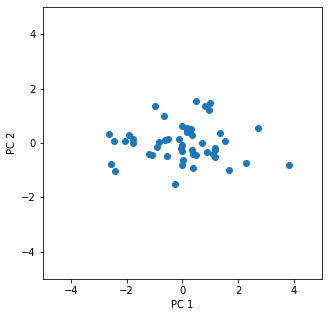

In [45]:
# Project the data onto the principal component axes:
proj = x_meansub @ PCs.T

# Plot the data projected along the first two PCs:
plt.figure(figsize=(5,5))
plt.plot(proj[:,0], proj[:,1], 'o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim(-5,5)
plt.ylim(-5,5)